## Desafio N°2
#### Creación de un Modelo Predictivo


Importamos las librerías que vamos a utilizar.

In [53]:
import pandas as pd
import numpy as np
import re

Leemos el archivo 'properati.csv' con pd.read_csv.
   Lo nombramos como variable data, y luego visualizamos con pd.head, 
   para poder ver cuales son algunas de las columnas de nuestra data.

In [54]:
data_location="properati.csv"
data=pd.read_csv(data_location,",")
data.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


Identificamos todas las columnas, para entender de  que manera está organizado nuestro DataFrame.

In [55]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

Quitamos algunas de las columnas que no necesitamos.


In [56]:
data1=data.loc[:,['operation','property_type','place_name','place_with_parent_names','state_name','price','currency','price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2']]
data1.head(5)

,operation,property_type,place_name,place_with_parent_names,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429


Contamos cuantas propiedades por lugar hay en la columna 'place_name':


In [57]:
data1.place_name.value_counts().head(20)

Córdoba            9254
Rosario            8504
Mar del Plata      6534
Tigre              3324
Nordelta           3315
Belgrano           2992
Palermo            2885
La Plata           2534
Caballito          2273
Pilar              2228
Villa Urquiza      1632
Olivos             1590
Recoleta           1547
Lomas de Zamora    1529
Flores             1354
Ituzaingó          1340
Villa Crespo       1331
Capital Federal    1297
San Telmo          1216
Morón              1209
Name: place_name, dtype: int64

Vemos que tipos de datos hay en cada columna para comprobar que los tipos de datos de cada columna esten correctos

In [58]:
data1.dtypes

operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
state_name                     object
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
dtype: object

Vemos cual es el porcentaje de valores nulos en cada columna

In [59]:
nulos = data1.isnull().sum()/data.shape[0]*100
nulos

operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
state_name                     0.000000
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
dtype: float64

Reemplazamos el valor de toda la columna place_name con el ultimo elemento de la columna place_with_parent_names asi esta primera columna pasa  a tener 0 registros nulos. 

Para eso primero creamos una serie que tenga como elementos a los valores de la columna place_with_parent_names.

In [60]:
a=data1['place_with_parent_names'].apply(lambda x: re.split("\|+",x))
print(a)

0               [, Argentina, Capital Federal, Mataderos, ]
1         [, Argentina, Bs.As. G.B.A. Zona Sur, La Plata, ]
2               [, Argentina, Capital Federal, Mataderos, ]
3                 [, Argentina, Capital Federal, Liniers, ]
4         [, Argentina, Buenos Aires Costa Atlántica, Ma...
                                ...                        
121215           [, Argentina, Capital Federal, Belgrano, ]
121216    [, Argentina, Bs.As. G.B.A. Zona Norte, San Is...
121217      [, Argentina, Capital Federal, Villa Urquiza, ]
121218    [, Argentina, Buenos Aires Costa Atlántica, Ma...
121219                     [, Argentina, Capital Federal, ]
Name: place_with_parent_names, Length: 121220, dtype: object


Realizamos un regex para extraer información de la columna 'place_with_parent_names' a fin de identificar mejor de que lugar es cada propiedad.


In [61]:
h=data1['place_with_parent_names'].apply(lambda x: re.split("\|+",x)[2] if len(re.split("\|+",x))==4 else re.split("\|+",x)[2] + " " +  re.split("\|+",x)[3])
data1['place_name']=h

i=data1['place_with_parent_names'].apply(lambda x: re.split("\|+",x)[2] if len(re.split("\|+",x))<5 else re.split("\|+",x)[4]) 
data1['place_name_2']=i

h.head(20)

0                      Capital Federal Mataderos
1                Bs.As. G.B.A. Zona Sur La Plata
2                      Capital Federal Mataderos
3                        Capital Federal Liniers
4     Buenos Aires Costa Atlántica Mar del Plata
5                        Entre Ríos Gualeguaychú
6         Bs.As. G.B.A. Zona Norte Vicente López
7                       Capital Federal Belgrano
8                       Capital Federal Belgrano
9                               Santa Fe Rosario
10                               Córdoba Córdoba
11           Bs.As. G.B.A. Zona Norte San Miguel
12           Bs.As. G.B.A. Zona Norte San Isidro
13                       Capital Federal Palermo
14                       Capital Federal Palermo
15           Bs.As. G.B.A. Zona Norte San Miguel
16                     Capital Federal Mataderos
17                Bs.As. G.B.A. Zona Norte Tigre
18                Bs.As. G.B.A. Zona Norte Tigre
19                       Capital Federal Palermo
Name: place_with_par

Ahora vemos que valores hay en la columna actualizada place_name.

In [62]:
data1.place_name.value_counts().head(20)

Bs.As. G.B.A. Zona Norte Tigre                 8983
Santa Fe Rosario                               8504
Buenos Aires Costa Atlántica Mar del Plata     7710
Córdoba Córdoba                                6606
Capital Federal Palermo                        4083
Bs.As. G.B.A. Zona Norte Vicente López         3663
Bs.As. G.B.A. Zona Sur Lomas de Zamora         3470
Bs.As. G.B.A. Zona Sur La Plata                3360
Bs.As. G.B.A. Zona Norte Pilar                 3249
Bs.As. G.B.A. Zona Norte San Isidro            3009
Capital Federal Belgrano                       2992
Córdoba                                        2648
Bs.As. G.B.A. Zona Oeste Morón                 2645
Bs.As. G.B.A. Zona Oeste La Matanza            2347
Capital Federal Caballito                      2273
Bs.As. G.B.A. Zona Norte Escobar               1909
Bs.As. G.B.A. Zona Sur Lanús                   1816
Capital Federal Villa Urquiza                  1629
Bs.As. G.B.A. Zona Sur Almirante Brown         1603
Bs.As. G.B.A

Vemos los valores nulos de esta columna, que ahora si deberia ser 0.

In [63]:
data1['place_name'].isnull().sum()

0

In [64]:
data1['place_name'].head(15)

0                      Capital Federal Mataderos
1                Bs.As. G.B.A. Zona Sur La Plata
2                      Capital Federal Mataderos
3                        Capital Federal Liniers
4     Buenos Aires Costa Atlántica Mar del Plata
5                        Entre Ríos Gualeguaychú
6         Bs.As. G.B.A. Zona Norte Vicente López
7                       Capital Federal Belgrano
8                       Capital Federal Belgrano
9                               Santa Fe Rosario
10                               Córdoba Córdoba
11           Bs.As. G.B.A. Zona Norte San Miguel
12           Bs.As. G.B.A. Zona Norte San Isidro
13                       Capital Federal Palermo
14                       Capital Federal Palermo
Name: place_name, dtype: object

Ahora vamos a disminuir el porcentaje de nulos de la columna price_usd_per_m2

Esta columna tiene ~43% de valores nulos, pero como se calcula dividiendo la columna "price_aprox_usd" con la columna "surface_covered_in_m2" y ambas columnas tienen ~16% de valores nulos, entonces puedo recalcular los valores de la columa price_usd_per_m2 haciendo esta division y asi pasaria a tener un % de valores nulos menor.

In [65]:
c=data1.loc[:,'price_aprox_usd']/data1.loc[:,'surface_covered_in_m2']

data1['price_usd_per_m2']=c


Verificamos que haya disminuido el porcentaje de la columna price_usd_per_m2.


In [66]:
nulos = data1.isnull().sum()/data1.shape[0]*100
nulos

operation                      0.000000
property_type                  0.000000
place_name                     0.000000
place_with_parent_names        0.000000
state_name                     0.000000
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              27.685200
price_per_m2                  27.686850
place_name_2                   0.000000
dtype: float64

Hay valores de la columna price_aprox_usd que son distintos de cero cuando los de la columna surface_covered_in_m2 son iguales a cero
y viceversa, por lo cual podemos ver que la proporcion de nulos en la columna price_usd_per_m2 es ~27%. Sin embargo, este paso fue importante ya que logramos disminuir la cantidad de nulos a casi la mitad.

En el siguiente paso vamos a crear una mascara booleana para detectar si existen zonas (place_name_2) con menos de 10 propiedades. Esto va a permitirnos saber si es conveniente trabajar con este nivel de desagregacion o no.

In [67]:
data1.place_name_2.value_counts(ascending=True).head(30)

Laguna de los Padres                     1
Junín                                    1
Ramallo                                  1
Barrio San Benito                        1
Barrio cerrado La Cascada                1
Santa Trinidad                           1
Barrio Parque Girado                     1
Sierras Bayas                            1
Barrio Melazzi                           1
Barrio Cerrado "El Estribo"              1
Country Golf El Sosiego                  1
Barrio Cerrado "La Damasia"              1
Saint Matthews                           1
San Eliseo Country, Golf, Hotel & Spa    1
General Belgrano                         1
Roque Pérez                              1
Barrio Privado El Resuello               1
Villa Ventana                            1
La Escondida de Manzanares               1
Gral San Martin                          1
La Colina Golf & Polo                    1
El Canton Barrio Islas                   1
coordenadas 34.255511                    1
El Zorzal  

In [68]:
menos_10_prop = data1.place_name_2.value_counts() < 5
menos_10_prop.value_counts()

False    355
True     237
Name: place_name_2, dtype: int64

Como casi el 50% de las zonas tienen pocos registros, entonces no vamos a usar esta columna para desagregar la informacion con la que contamos.

Ahora simplemente renombramos todas las columnas y volvemos a imprimir el dataframe.

In [69]:
columnas_dic = {'operation': 'Tipo_de_operacion', 'property_type': 'tipo_de_propiedad', 'place_name' : 'ciudad', 'place_with_parent_names': 'ubicacion',
       'country_name': 'pais', 'state_name': 'provincia', 'price' : 'precio', 'price_aprox_local_currency': 'Precio_aproximado_en_pesos',
       'price_aprox_usd': 'precio_aproximado_en_USD', 'surface_total_in_m2': 'superficie_total_en_M2', 'surface_covered_in_m2': 'superficie_cubierta_en_M2',
       'price_usd_per_m2': 'Precio_en_Dolares_por_M2', 'price_per_m2': 'precio_por_M2'}
data1 = data1.rename(columns=columnas_dic)
data1.head()

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_total_en_M2,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2
0,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.0,62000.0,55.0,40.0,1550.000000,1550.000000,
1,sell,apartment,Bs.As. G.B.A. Zona Sur La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,
2,sell,apartment,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,
3,sell,PH,Capital Federal Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,
4,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,Centro


Ahora vamos a agrupar este ultimo dataframe segun 'provincia', 'ciudad' y 'place_name2' para poder visualizar mejor. 

In [70]:
data_2 = data1.groupby(['provincia', 'ciudad', 'place_name_2'])
data_2.head(5)

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_total_en_M2,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2
0,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.00,62000.00,55.0,40.0,1550.000000,1550.000000,
1,sell,apartment,Bs.As. G.B.A. Zona Sur La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,
2,sell,apartment,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,
3,sell,PH,Capital Federal Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,
4,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,USD,1129248.00,64000.00,35.0,35.0,1828.571429,1828.571429,Centro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119832,sell,house,Santa Fe Malabrigo,|Argentina|Santa Fe|Malabrigo|,Santa Fe,2500000.0,ARS,2473921.05,140209.19,300.0,130.0,1078.532231,19230.769231,
120061,sell,house,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,72000.0,USD,1270404.00,72000.00,500.0,86.0,837.209302,837.209302,Los Acantilados
120082,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,72000.0,USD,1270404.00,72000.00,50.0,45.0,1600.000000,1600.000000,Barrio La Perla Norte
120644,sell,house,Córdoba Agua de Oro,|Argentina|Córdoba|Agua de Oro|,Córdoba,NaN,NaN,NaN,NaN,NaN,140.0,NaN,NaN,


Sacamos todos los nulos de la columna 'Precio_en_Dolares_por_M2' para poder realizar un mejor filtro.

In [71]:
precio_M2_dolar_sin_nulos = data1.dropna(axis=0, subset=['Precio_en_Dolares_por_M2'])
precio_M2_dolar_sin_nulos


,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_total_en_M2,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2
0,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.00,62000.0,55.0,40.0,1550.000000,1550.000000,
2,sell,apartment,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,
4,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,USD,1129248.00,64000.0,35.0,35.0,1828.571429,1828.571429,Centro
6,sell,PH,Bs.As. G.B.A. Zona Norte Vicente López,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,130000.0,USD,2293785.00,130000.0,106.0,78.0,1666.666667,1666.666667,Munro
7,sell,apartment,Capital Federal Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,138000.0,USD,2434941.00,138000.0,45.0,40.0,3450.000000,3450.000000,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,sell,apartment,Capital Federal Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,870000.0,USD,15350715.00,870000.0,113.0,93.0,9354.838710,9354.838710,
121216,sell,house,Bs.As. G.B.A. Zona Norte San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,498000.0,USD,8786961.00,498000.0,360.0,360.0,1383.333333,1383.333333,Beccar
121217,sell,apartment,Capital Federal Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Capital Federal,131500.0,USD,2320251.75,131500.0,46.0,39.0,3371.794872,3371.794872,
121218,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,95900.0,USD,1692107.55,95900.0,48.0,48.0,1997.916667,1997.916667,Plaza Colón


Ahora creamos dummies para los distintos tipos de propiedad porque los vamos a  utilizar a futuro al hacer los modelos.

In [72]:
categories = ['tipo_de_propiedad']

In [73]:
for category in categories:
    serie = precio_M2_dolar_sin_nulos[category]
    dummies = pd.get_dummies(serie, drop_first= True, prefix=category)
    data1 = pd.concat([precio_M2_dolar_sin_nulos, dummies], axis=1)

data1.head(20)

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_total_en_M2,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2,tipo_de_propiedad_apartment,tipo_de_propiedad_house,tipo_de_propiedad_store
0,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.00,62000.0,55.0,40.0,1550.000000,1550.000000,,0,0,0
2,sell,apartment,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,,1,0,0
4,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,USD,1129248.00,64000.0,35.0,35.0,1828.571429,1828.571429,Centro,1,0,0
6,sell,PH,Bs.As. G.B.A. Zona Norte Vicente López,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,130000.0,USD,2293785.00,130000.0,106.0,78.0,1666.666667,1666.666667,Munro,0,0,0
7,sell,apartment,Capital Federal Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,138000.0,USD,2434941.00,138000.0,45.0,40.0,3450.000000,3450.000000,,1,0,0
8,sell,apartment,Capital Federal Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,195000.0,USD,3440677.50,195000.0,65.0,60.0,3250.000000,3250.000000,,1,0,0
12,sell,apartment,Bs.As. G.B.A. Zona Norte San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,115000.0,USD,2029117.50,115000.0,39.0,36.0,3194.444444,3194.444444,Martínez,1,0,0
13,sell,apartment,Capital Federal Palermo,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,111700.0,USD,1970890.65,111700.0,50.0,30.0,3723.333333,3723.333333,Palermo Soho,1,0,0
14,sell,apartment,Capital Federal Palermo,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,147900.0,USD,2609621.55,147900.0,42.0,31.0,4770.967742,4770.967742,Palermo Soho,1,0,0
16,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,239000.0,USD,4217035.50,239000.0,140.0,98.0,2438.775510,2438.775510,,0,0,0


Ahora actualizamos al dataframe precio_M2_dolar_sin_nulos para que contenga a las dummies creadas.

In [74]:
precio_M2_dolar_sin_nulos = data1
precio_M2_dolar_sin_nulos["provincia"].value_counts()


Capital Federal                 27326
Bs.As. G.B.A. Zona Norte        22518
Bs.As. G.B.A. Zona Sur           9907
Buenos Aires Costa Atlántica     6924
Córdoba                          6456
Bs.As. G.B.A. Zona Oeste         6266
Santa Fe                         4677
Buenos Aires Interior            1441
Mendoza                           430
Corrientes                        422
Neuquén                           274
Río Negro                         215
Misiones                          209
San Luis                          154
Tucumán                            98
Entre Ríos                         95
Salta                              76
Chubut                             50
Chaco                              28
Tierra Del Fuego                   26
Catamarca                          21
La Pampa                           19
Jujuy                              10
Santa Cruz                          9
San Juan                            4
Santiago Del Estero                 3
La Rioja    

In [75]:
precio_M2_dolar_sin_nulos.head(3)

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_total_en_M2,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2,tipo_de_propiedad_apartment,tipo_de_propiedad_house,tipo_de_propiedad_store
0,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.0,62000.0,55.0,40.0,1550.000000,1550.000000,,0,0,0
2,sell,apartment,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,,1,0,0
4,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,Centro,1,0,0


Realizamos un grafico de torta para visualizar que porcentaje de la distribucion geografica se debe a cada provincia.

In [76]:
import plotly.graph_objects as go

labels = ['Capital Federal ','Bs.As. G.B.A', 'Córdoba',
         'Santa Fe', 'Otros']
values = [27326, 44026, 6456, 6266,  1441, 2145]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

Importamos librerias que vamos a utilizar proximamente.

In [77]:
from collections import Counter
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True) #do not miss this line
import warnings

warnings.filterwarnings('ignore')


Ahora vamos a crear un modelo predictivo para cada una de las 4 zonas mas representativas del pais: CABA, BA, Cordoba y Santa Fe. 



### CABA:

Comenzando por CABA, vamos a crear una mascara que permita filtrar nuestro dataset para poder trabajar solo con los datos de este distrito.

In [78]:
mascara_CABA=precio_M2_dolar_sin_nulos["provincia"]=="Capital Federal"
data_CABA=precio_M2_dolar_sin_nulos[mascara_CABA]
data_CABA

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_total_en_M2,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2,tipo_de_propiedad_apartment,tipo_de_propiedad_house,tipo_de_propiedad_store
0,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.00,62000.0,55.0,40.0,1550.000000,1550.000000,,0,0,0
2,sell,apartment,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,,1,0,0
7,sell,apartment,Capital Federal Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,138000.0,USD,2434941.00,138000.0,45.0,40.0,3450.000000,3450.000000,,1,0,0
8,sell,apartment,Capital Federal Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,195000.0,USD,3440677.50,195000.0,65.0,60.0,3250.000000,3250.000000,,1,0,0
13,sell,apartment,Capital Federal Palermo,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,111700.0,USD,1970890.65,111700.0,50.0,30.0,3723.333333,3723.333333,Palermo Soho,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121157,sell,apartment,Capital Federal Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,128000.0,USD,2258496.00,128000.0,38.0,35.0,3657.142857,3657.142857,,1,0,0
121158,sell,apartment,Capital Federal Recoleta,|Argentina|Capital Federal|Recoleta|,Capital Federal,165000.0,USD,2911342.50,165000.0,44.0,39.0,4230.769231,4230.769231,,1,0,0
121215,sell,apartment,Capital Federal Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,870000.0,USD,15350715.00,870000.0,113.0,93.0,9354.838710,9354.838710,,1,0,0
121217,sell,apartment,Capital Federal Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Capital Federal,131500.0,USD,2320251.75,131500.0,46.0,39.0,3371.794872,3371.794872,,1,0,0


En el proximo paso vamos a eliminar los outliers de cada barrio por separado y vamos a crear un dataset que contenga los datos limpios.Tambien droppeamos la columna 'superficie_total_en_M2' por tener 5000 registros nulos. En su lugar podremos seguir trabajando con la columna 'superficie_cubierta_en_M2'que tiene 0 registros nulos.

In [79]:
data_CABA=data_CABA.drop(['superficie_total_en_M2'],axis=1)
list_barrios=[]
data_barrio_concat = pd.DataFrame(columns=['Tipo_de_operacion','tipo_de_propiedad','ciudad','ubicacion','provincia','precio','currency','Precio_aproximado_en_pesos','precio_aproximado_en_USD','superficie_cubierta_en_M2','Precio_en_Dolares_por_M2','precio_por_M2','place_name_2','tipo_de_propiedad_apartment','tipo_de_propiedad_house','tipo_de_propiedad_store'])
for x in data_CABA["ciudad"].unique():
    list_barrios.append(x)
    maskbarrio=data_CABA["ciudad"]==x
    data_barrio=data_CABA[maskbarrio]
    q1_barrio=data_barrio.Precio_en_Dolares_por_M2.quantile(0.25)
    q2_barrio=data_barrio.Precio_en_Dolares_por_M2.quantile(0.5)
    q3_barrio=data_barrio.Precio_en_Dolares_por_M2.quantile(0.75)
    iqr_barrio=(q3_barrio-q1_barrio)*1.5
    up_threshold_barrio = q3_barrio + iqr_barrio
    low_threshold_barrio = q1_barrio - iqr_barrio
    outlier_mask_up_barrio = data_barrio.Precio_en_Dolares_por_M2 > up_threshold_barrio
    outlier_mask_down_barrio = data_barrio.Precio_en_Dolares_por_M2 < low_threshold_barrio
    outlier_mask_barrio = np.logical_or(outlier_mask_up_barrio, outlier_mask_down_barrio)
    not_outliers_barrio = np.logical_not(outlier_mask_barrio)
    data_barrio_sin_outliers = data_barrio[not_outliers_barrio]
    #data_barrio_concat.append(data_barrio_sin_outliers)
    #pd.concat([data_barrio_concat, data_barrio_sin_outliers], ignore_index=True, sort=False)
    data_barrio_concat=pd.merge(data_barrio_concat, data_barrio_sin_outliers, how='outer')
data_barrio_concat

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2,tipo_de_propiedad_apartment,tipo_de_propiedad_house,tipo_de_propiedad_store
0,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.0,62000.0,40.0,1550.000000,1550.000000,,0,0,0
1,sell,apartment,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.0,72000.0,55.0,1309.090909,1309.090909,,1,0,0
2,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,239000.0,USD,4217035.5,239000.0,98.0,2438.775510,2438.775510,,0,0,0
3,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,53000.0,USD,935158.5,53000.0,28.0,1892.857143,1892.857143,,0,0,0
4,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,245000.0,USD,4322902.5,245000.0,160.0,1531.250000,1531.250000,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25930,sell,house,Capital Federal Villa Real,|Argentina|Capital Federal|Villa Real|,Capital Federal,229000.0,USD,4040590.5,229000.0,163.0,1404.907975,1404.907975,,0,1,0
25931,sell,PH,Capital Federal Villa Riachuelo,|Argentina|Capital Federal|Villa Riachuelo|,Capital Federal,150000.0,USD,2646675.0,150000.0,66.0,2272.727273,2272.727273,,0,0,0
25932,sell,house,Capital Federal Villa Riachuelo,|Argentina|Capital Federal|Villa Riachuelo|,Capital Federal,200000.0,USD,3528900.0,200000.0,141.0,1418.439716,1418.439716,,0,1,0
25933,sell,apartment,Capital Federal Villa Riachuelo,|Argentina|Capital Federal|Villa Riachuelo|,Capital Federal,85000.0,USD,1499782.5,85000.0,60.0,1416.666667,1416.666667,,1,0,0


In [80]:
 import matplotlib.pyplot as plt 
# import numpy as np 
 import matplotlib as mpl 
# import pandas as pd


# data_barrio_concat.boxplot(column=['Precio_en_Dolares_por_M2'], by= ['ciudad'],figsize=(300,20))

Importamos librerias que nos serviran para realizar los modelos predictivos.

In [81]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

Definimos los modelos que vamos a usar.

In [82]:
modelos = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.RidgeCV(normalize=True),
                  lasso = linear_model.LassoCV(normalize=True))

Ahora seteamos los parametros para la creacion de los primeros 3 modelos: regresion lineal multiple, ridge, y lasso. Para cada caso primero utilizaremos un 65% de los datos para entrenar al modelo y el 35% restante para testearlo, pero posteriormente tambien haremos cross validation. Ademas, vamos a obtener los scores de Rcuad. y Rcuad.Ajustado para cada caso.

In [83]:
columnas = ['superficie_cubierta_en_M2', 'Precio_en_Dolares_por_M2','precio_por_M2', 'tipo_de_propiedad_apartment','tipo_de_propiedad_house', 'tipo_de_propiedad_store']

X = data_barrio_concat[columnas]
y = data_barrio_concat['precio']
n = data_barrio_concat.shape[0]
k = len(columnas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

for nombre, mdl in modelos.items():
    seleccion = mdl
    model = mdl.fit(X_train,y_train)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    print(nombre, model.score(X_test, y_test), scores)
    R_Ajustado = 1-((n-1)/(n-k-1))*(1-(model.score(X_test, y_test)))
    print("R ajustado: ", R_Ajustado)

ols 0.7006683503849922 0.6132314990906764
R ajustado:  0.7005990820304069
ridge 0.7067051708838827 0.6413573947821712
R ajustado:  0.706637299510283
lasso 0.7026905940326149 0.6593088788792528
R ajustado:  0.7026217936455506


Si bien estos resultados son aceptables para el modelo, ahora vamos a realizar otro tipo de modelo para saber si creando dummies para cada barrio el modelo puede mejorar o no.

In [84]:
data_barrio_concat

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2,tipo_de_propiedad_apartment,tipo_de_propiedad_house,tipo_de_propiedad_store
0,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.0,62000.0,40.0,1550.000000,1550.000000,,0,0,0
1,sell,apartment,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.0,72000.0,55.0,1309.090909,1309.090909,,1,0,0
2,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,239000.0,USD,4217035.5,239000.0,98.0,2438.775510,2438.775510,,0,0,0
3,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,53000.0,USD,935158.5,53000.0,28.0,1892.857143,1892.857143,,0,0,0
4,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,245000.0,USD,4322902.5,245000.0,160.0,1531.250000,1531.250000,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25930,sell,house,Capital Federal Villa Real,|Argentina|Capital Federal|Villa Real|,Capital Federal,229000.0,USD,4040590.5,229000.0,163.0,1404.907975,1404.907975,,0,1,0
25931,sell,PH,Capital Federal Villa Riachuelo,|Argentina|Capital Federal|Villa Riachuelo|,Capital Federal,150000.0,USD,2646675.0,150000.0,66.0,2272.727273,2272.727273,,0,0,0
25932,sell,house,Capital Federal Villa Riachuelo,|Argentina|Capital Federal|Villa Riachuelo|,Capital Federal,200000.0,USD,3528900.0,200000.0,141.0,1418.439716,1418.439716,,0,1,0
25933,sell,apartment,Capital Federal Villa Riachuelo,|Argentina|Capital Federal|Villa Riachuelo|,Capital Federal,85000.0,USD,1499782.5,85000.0,60.0,1416.666667,1416.666667,,1,0,0


In [85]:
categories = ["ciudad"]
for category in categories:
    serie = data_barrio_concat[category]
    dummies = pd.get_dummies(serie, drop_first= True, prefix=category)
    data_barrio_concat = pd.concat([data_barrio_concat, dummies], axis=1)

data_barrio_concat

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_cubierta_en_M2,...,ciudad_Capital Federal Villa Lugano,ciudad_Capital Federal Villa Luro,ciudad_Capital Federal Villa Ortuzar,ciudad_Capital Federal Villa Pueyrredón,ciudad_Capital Federal Villa Real,ciudad_Capital Federal Villa Riachuelo,ciudad_Capital Federal Villa Santa Rita,ciudad_Capital Federal Villa Soldati,ciudad_Capital Federal Villa Urquiza,ciudad_Capital Federal Villa del Parque
0,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,62000.0,USD,1093959.0,62000.0,40.0,...,0,0,0,0,0,0,0,0,0,0
1,sell,apartment,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,72000.0,USD,1270404.0,72000.0,55.0,...,0,0,0,0,0,0,0,0,0,0
2,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,239000.0,USD,4217035.5,239000.0,98.0,...,0,0,0,0,0,0,0,0,0,0
3,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,53000.0,USD,935158.5,53000.0,28.0,...,0,0,0,0,0,0,0,0,0,0
4,sell,PH,Capital Federal Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,245000.0,USD,4322902.5,245000.0,160.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25930,sell,house,Capital Federal Villa Real,|Argentina|Capital Federal|Villa Real|,Capital Federal,229000.0,USD,4040590.5,229000.0,163.0,...,0,0,0,0,1,0,0,0,0,0
25931,sell,PH,Capital Federal Villa Riachuelo,|Argentina|Capital Federal|Villa Riachuelo|,Capital Federal,150000.0,USD,2646675.0,150000.0,66.0,...,0,0,0,0,0,1,0,0,0,0
25932,sell,house,Capital Federal Villa Riachuelo,|Argentina|Capital Federal|Villa Riachuelo|,Capital Federal,200000.0,USD,3528900.0,200000.0,141.0,...,0,0,0,0,0,1,0,0,0,0
25933,sell,apartment,Capital Federal Villa Riachuelo,|Argentina|Capital Federal|Villa Riachuelo|,Capital Federal,85000.0,USD,1499782.5,85000.0,60.0,...,0,0,0,0,0,1,0,0,0,0


In [86]:
data_barrio_concat.columns.value_counts()

currency                                    1
provincia                                   1
ciudad_Capital Federal Palermo              1
tipo_de_propiedad_house                     1
ciudad_Capital Federal Parque Avellaneda    1
                                           ..
ciudad_Capital Federal Floresta             1
ciudad_Capital Federal Paternal             1
ciudad_Capital Federal Villa Urquiza        1
ciudad_Capital Federal Agronomía            1
ciudad_Capital Federal Barrio Norte         1
Length: 73, dtype: int64

In [87]:
barrios_caba= ['Abasto', 'Agronomía',
       'Almagro', 'Balvanera',
       'Barracas',
       'Barrio Norte',
       'ciudad_Capital Federal Belgrano', 'ciudad_Capital Federal Boca',
       'ciudad_Capital Federal Boedo', 'ciudad_Capital Federal Caballito',
       'ciudad_Capital Federal Catalinas',
       'ciudad_Capital Federal Centro / Microcentro',
       'ciudad_Capital Federal Chacarita', 'ciudad_Capital Federal Coghlan',
       'ciudad_Capital Federal Colegiales', 'ciudad_Capital Federal Congreso',
       'ciudad_Capital Federal Constitución', 'ciudad_Capital Federal Flores',
       'ciudad_Capital Federal Floresta', 'ciudad_Capital Federal Las Cañitas',
       'ciudad_Capital Federal Liniers', 'ciudad_Capital Federal Mataderos',
       'ciudad_Capital Federal Monserrat',
       'ciudad_Capital Federal Monte Castro', 'ciudad_Capital Federal Nuñez',
       'ciudad_Capital Federal Once', 'ciudad_Capital Federal Palermo',
       'ciudad_Capital Federal Parque Avellaneda',
       'ciudad_Capital Federal Parque Centenario',
       'ciudad_Capital Federal Parque Chacabuco',
       'ciudad_Capital Federal Parque Chas',
       'ciudad_Capital Federal Parque Patricios',
       'ciudad_Capital Federal Paternal', 'ciudad_Capital Federal Pompeya',
       'ciudad_Capital Federal Puerto Madero',
       'ciudad_Capital Federal Recoleta', 'ciudad_Capital Federal Retiro',
       'ciudad_Capital Federal Saavedra',
       'ciudad_Capital Federal San Cristobal',
       'ciudad_Capital Federal San Nicolás',
       'ciudad_Capital Federal San Telmo', 'ciudad_Capital Federal Tribunales',
       'ciudad_Capital Federal Velez Sarsfield',
       'ciudad_Capital Federal Versalles',
       'ciudad_Capital Federal Villa Crespo',
       'ciudad_Capital Federal Villa Devoto',
       'ciudad_Capital Federal Villa General Mitre',
       'ciudad_Capital Federal Villa Lugano',
       'ciudad_Capital Federal Villa Luro',
       'ciudad_Capital Federal Villa Ortuzar',
       'ciudad_Capital Federal Villa Pueyrredón',
       'ciudad_Capital Federal Villa Real',
       'ciudad_Capital Federal Villa Riachuelo',
       'ciudad_Capital Federal Villa Santa Rita',
       'ciudad_Capital Federal Villa Soldati',
       'ciudad_Capital Federal Villa Urquiza',
       'ciudad_Capital Federal Villa del Parque']
barrios_caba

['Abasto',
 'Agronomía',
 'Almagro',
 'Balvanera',
 'Barracas',
 'Barrio Norte',
 'ciudad_Capital Federal Belgrano',
 'ciudad_Capital Federal Boca',
 'ciudad_Capital Federal Boedo',
 'ciudad_Capital Federal Caballito',
 'ciudad_Capital Federal Catalinas',
 'ciudad_Capital Federal Centro / Microcentro',
 'ciudad_Capital Federal Chacarita',
 'ciudad_Capital Federal Coghlan',
 'ciudad_Capital Federal Colegiales',
 'ciudad_Capital Federal Congreso',
 'ciudad_Capital Federal Constitución',
 'ciudad_Capital Federal Flores',
 'ciudad_Capital Federal Floresta',
 'ciudad_Capital Federal Las Cañitas',
 'ciudad_Capital Federal Liniers',
 'ciudad_Capital Federal Mataderos',
 'ciudad_Capital Federal Monserrat',
 'ciudad_Capital Federal Monte Castro',
 'ciudad_Capital Federal Nuñez',
 'ciudad_Capital Federal Once',
 'ciudad_Capital Federal Palermo',
 'ciudad_Capital Federal Parque Avellaneda',
 'ciudad_Capital Federal Parque Centenario',
 'ciudad_Capital Federal Parque Chacabuco',
 'ciudad_Capital F

Ahora definimos cuales seran las variables explicativas de este nuevo set de modelos y los corremos. 

In [88]:
columnas_conbarrios = data_barrio_concat.drop(['place_name_2','Tipo_de_operacion', 'tipo_de_propiedad', 'ciudad', 'ubicacion','provincia', 'precio', 'currency'], axis=1)


In [89]:
#Con los dummies de barrio logramos mejorar el modelo

X = columnas_conbarrios
y = data_barrio_concat.precio
n = data_barrio_concat.shape[0]
k = len(columnas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

for nombre, mdl in modelos.items():
    seleccion = mdl
    model = mdl.fit(X_train,y_train)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    print(nombre, model.score(X_test, y_test), scores)
    R_Ajustado = 1-((n-1)/(n-k-1))*(1-(model.score(X_test, y_test)))
    print("R ajustado: ", R_Ajustado)

ols 0.8237870331422963 0.7668148350236306
R ajustado:  0.8237462556893055
ridge 0.8146187205401219 0.7803041757386161
R ajustado:  0.8145758214473743
lasso 0.8237973755041432 0.7674336657031308
R ajustado:  0.823756600444479


<AxesSubplot:>

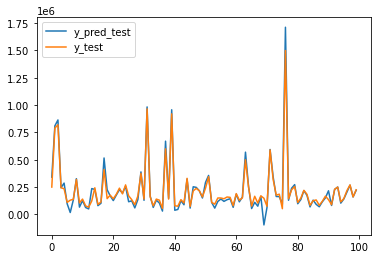

In [90]:
y_pred_test=model.predict(X_test)
y_pred_test=pd.DataFrame(y_pred_test)

y_test=pd.DataFrame(y_test)

concat=pd.concat([y_pred_test,y_test.reset_index(drop=True)],axis=1)
concat=concat.rename(columns={0:'y_pred_test','precio':'y_test'})
concat.iloc[0:100,:].plot()

Text(0.5, 1.0, 'Predicted vs Actual Values')

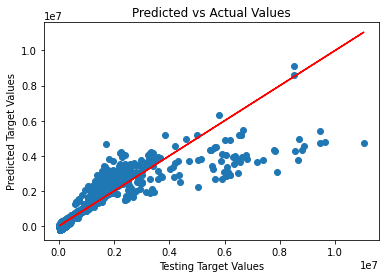

In [91]:
y_pred_test=model.predict(X_test)
y_pred_test=pd.DataFrame(y_pred_test)

fig, ax=plt.subplots()
ax.scatter(y_test,y_pred_test)
ax.plot(y_test,y_test,color='red')
ax.set_xlabel('Testing Target Values')
ax.set_ylabel('Predicted Target Values')
ax.set_title('Predicted vs Actual Values')

Observamos valores superiores al 80% por lo cual consideramos que este modelo es el mejor, y mas explicitamente el modelo de prediccion Lasso es el mejor dentro de estos 3. 

### BA:

Continuamos con Bs.As. y vamos a crear una mascara que permita filtrar nuestro dataset para poder trabajar solo con los datos de este distrito.


In [92]:
#Para la mascara combine que contenga Bs.As. o que contenga "Buenos Aires" porque los de gba dicen lo primero pero los partidos de la costa por ej lo segundo
mascara_BsAs = (precio_M2_dolar_sin_nulos["provincia"].str.contains("Bs.As."))|(precio_M2_dolar_sin_nulos["provincia"].str.contains("Buenos Aires"))
data_BsAs=precio_M2_dolar_sin_nulos[mascara_BsAs]
print(data_BsAs["provincia"].value_counts())
print(data_BsAs.isnull().sum())

Bs.As. G.B.A. Zona Norte        22518
Bs.As. G.B.A. Zona Sur           9907
Buenos Aires Costa Atlántica     6924
Bs.As. G.B.A. Zona Oeste         6266
Buenos Aires Interior            1441
Name: provincia, dtype: int64
Tipo_de_operacion                  0
tipo_de_propiedad                  0
ciudad                             0
ubicacion                          0
provincia                          0
precio                             0
currency                           0
Precio_aproximado_en_pesos         0
precio_aproximado_en_USD           0
superficie_total_en_M2         14223
superficie_cubierta_en_M2          0
Precio_en_Dolares_por_M2           0
precio_por_M2                      0
place_name_2                       0
tipo_de_propiedad_apartment        0
tipo_de_propiedad_house            0
tipo_de_propiedad_store            0
dtype: int64


En el proximo paso vamos a eliminar los outliers de cada barrio por separado y vamos a crear un dataset que contenga los datos limpios. Tambien droppeamos la columna 'superficie_total_en_M2' por tener 5000 registros nulos. En su lugar podremos seguir trabajando con la columna 'superficie_cubierta_en_M2'que tiene 0 registros nulos.

In [93]:
data_BsAs=data_BsAs.drop(['superficie_total_en_M2'],axis=1)
list_barrios=[]
data_barrio_concat = pd.DataFrame(columns=['Tipo_de_operacion','tipo_de_propiedad','ciudad','ubicacion','provincia','precio','currency','Precio_aproximado_en_pesos','precio_aproximado_en_USD','superficie_cubierta_en_M2','Precio_en_Dolares_por_M2','precio_por_M2','place_name_2','tipo_de_propiedad_apartment','tipo_de_propiedad_house','tipo_de_propiedad_store'])
for x in data_BsAs["ciudad"].unique():
    list_barrios.append(x)
    maskbarrio=data_BsAs["ciudad"]==x
    data_barrio=data_BsAs[maskbarrio]
    q1_barrio=data_barrio.Precio_en_Dolares_por_M2.quantile(0.25)
    q2_barrio=data_barrio.Precio_en_Dolares_por_M2.quantile(0.5)
    q3_barrio=data_barrio.Precio_en_Dolares_por_M2.quantile(0.75)
    iqr_barrio=(q3_barrio-q1_barrio)*1.5
    up_threshold_barrio = q3_barrio + iqr_barrio
    low_threshold_barrio = q1_barrio - iqr_barrio
    outlier_mask_up_barrio = data_barrio.Precio_en_Dolares_por_M2 > up_threshold_barrio
    outlier_mask_down_barrio = data_barrio.Precio_en_Dolares_por_M2 < low_threshold_barrio
    outlier_mask_barrio = np.logical_or(outlier_mask_up_barrio, outlier_mask_down_barrio)
    not_outliers_barrio = np.logical_not(outlier_mask_barrio)
    data_barrio_sin_outliers = data_barrio[not_outliers_barrio]
    #data_barrio_concat.append(data_barrio_sin_outliers)
    #pd.concat([data_barrio_concat, data_barrio_sin_outliers], ignore_index=True, sort=False)
    data_barrio_concat=pd.merge(data_barrio_concat, data_barrio_sin_outliers, how='outer')
data_barrio_concat

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2,tipo_de_propiedad_apartment,tipo_de_propiedad_house,tipo_de_propiedad_store
0,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,USD,1129248.00,64000.00,35.0,1828.571429,1828.571429,Centro,1,0,0
1,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,235000.0,USD,4146457.50,235000.00,72.0,3263.888889,3263.888889,,1,0,0
2,sell,house,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,350000.0,USD,6175575.00,350000.00,207.0,1690.821256,1690.821256,,0,1,0
3,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,51000.0,USD,899869.50,51000.00,29.0,1758.620690,1758.620690,,1,0,0
4,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,51000.0,USD,899869.50,51000.00,29.0,1758.620690,1758.620690,,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45002,sell,house,Buenos Aires Interior Pehuajó,|Argentina|Buenos Aires Interior|Pehuajó|Pehuajó|,Buenos Aires Interior,120000.0,USD,2117340.00,120000.00,140.0,857.142857,857.142857,Pehuajó,0,1,0
45003,sell,house,Buenos Aires Interior Pehuajó,|Argentina|Buenos Aires Interior|Pehuajó|Pehuajó|,Buenos Aires Interior,135000.0,USD,2382007.50,135000.00,206.0,655.339806,655.339806,Pehuajó,0,1,0
45004,sell,PH,Buenos Aires Interior Pehuajó,|Argentina|Buenos Aires Interior|Pehuajó|Pehuajó|,Buenos Aires Interior,80000.0,USD,1411560.00,80000.00,80.0,1000.000000,1000.000000,Pehuajó,0,0,0
45005,sell,house,Buenos Aires Interior Pehuajó,|Argentina|Buenos Aires Interior|Pehuajó|Pehuajó|,Buenos Aires Interior,75000.0,USD,1323337.50,75000.00,100.0,750.000000,750.000000,Pehuajó,0,1,0


Ahora seteamos los parametros para la creacion de los primeros 3 modelos: regresion lineal multiple, ridge, y lasso. Para cada caso primero utilizaremos un 65% de los datos para entrenar al modelo y el 35% restante para testearlo, pero posteriormente tambien haremos cross validation. Ademas, vamos a obtener los scores de Rcuad. y Rcuad.Ajustado para cada caso.

In [94]:
columnas = ['superficie_cubierta_en_M2', 'Precio_en_Dolares_por_M2','precio_por_M2', 'tipo_de_propiedad_apartment','tipo_de_propiedad_house', 'tipo_de_propiedad_store']

X = data_barrio_concat[columnas]
y = data_barrio_concat['precio']
n = data_barrio_concat.shape[0]
k = len(columnas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

for nombre, mdl in modelos.items():
    seleccion = mdl
    model = mdl.fit(X_train,y_train)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    print(nombre, model.score(X_test, y_test), scores)
    R_Ajustado = 1-((n-1)/(n-k-1))*(1-(model.score(X_test, y_test)))
    print("R ajustado: ", R_Ajustado)

ols 0.7341934111158663 0.5764201405243929
R ajustado:  0.7341579702373484
ridge 0.7398834897227144 0.6102705959047611
R ajustado:  0.7398488075213441
lasso 0.7345116917236947 0.5903904340269864
R ajustado:  0.7344762932825912


Si bien estos resultados son aceptables para el modelo, ahora vamos a realizar otro tipo de modelo para saber si creando dummies para cada zona el modelo puede mejorar o no.


In [95]:
#Creamos dummys de la provicia de Buenos Aires para mejorar el modelo

categories = ["ciudad"]
for category in categories:
    serie = data_barrio_concat[category]
    dummies = pd.get_dummies(serie, drop_first= True, prefix=category)
    data_barrio_concat = pd.concat([data_barrio_concat, dummies], axis=1)

data_barrio_concat

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_cubierta_en_M2,...,ciudad_Buenos Aires Interior San Miguel del Monte,ciudad_Buenos Aires Interior San Nicolás de los Arroyos,ciudad_Buenos Aires Interior San Pedro,ciudad_Buenos Aires Interior Suipacha,ciudad_Buenos Aires Interior Tandil,ciudad_Buenos Aires Interior Tornquist,ciudad_Buenos Aires Interior Trenque Lauquen,ciudad_Buenos Aires Interior Tres Arroyos,ciudad_Buenos Aires Interior Veinticinco de Mayo,ciudad_Buenos Aires Interior Zárate
0,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,64000.0,USD,1129248.00,64000.00,35.0,...,0,0,0,0,0,0,0,0,0,0
1,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,235000.0,USD,4146457.50,235000.00,72.0,...,0,0,0,0,0,0,0,0,0,0
2,sell,house,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,350000.0,USD,6175575.00,350000.00,207.0,...,0,0,0,0,0,0,0,0,0,0
3,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,51000.0,USD,899869.50,51000.00,29.0,...,0,0,0,0,0,0,0,0,0,0
4,sell,apartment,Buenos Aires Costa Atlántica Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,51000.0,USD,899869.50,51000.00,29.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45002,sell,house,Buenos Aires Interior Pehuajó,|Argentina|Buenos Aires Interior|Pehuajó|Pehuajó|,Buenos Aires Interior,120000.0,USD,2117340.00,120000.00,140.0,...,0,0,0,0,0,0,0,0,0,0
45003,sell,house,Buenos Aires Interior Pehuajó,|Argentina|Buenos Aires Interior|Pehuajó|Pehuajó|,Buenos Aires Interior,135000.0,USD,2382007.50,135000.00,206.0,...,0,0,0,0,0,0,0,0,0,0
45004,sell,PH,Buenos Aires Interior Pehuajó,|Argentina|Buenos Aires Interior|Pehuajó|Pehuajó|,Buenos Aires Interior,80000.0,USD,1411560.00,80000.00,80.0,...,0,0,0,0,0,0,0,0,0,0
45005,sell,house,Buenos Aires Interior Pehuajó,|Argentina|Buenos Aires Interior|Pehuajó|Pehuajó|,Buenos Aires Interior,75000.0,USD,1323337.50,75000.00,100.0,...,0,0,0,0,0,0,0,0,0,0


Ahora definimos cuales seran las variables explicativas de este nuevo set de modelos y los corremos. 


In [96]:
columnas_conbarrios_bsas = data_barrio_concat.drop(['place_name_2','Tipo_de_operacion', 'tipo_de_propiedad', 'ciudad', 'ubicacion','provincia', 'precio', 'currency'], axis=1)

In [97]:
#Con los dummies de zona de bsas logramos mejorar el modelo

X = columnas_conbarrios_bsas
y = data_barrio_concat.precio
n = data_barrio_concat.shape[0]
k = len(columnas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

for nombre, mdl in modelos.items():
    seleccion = mdl
    model = mdl.fit(X_train,y_train)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    print(nombre, model.score(X_test, y_test), scores)
    R_Ajustado = 1-((n-1)/(n-k-1))*(1-(model.score(X_test, y_test)))
    print("R ajustado: ", R_Ajustado)

ols 0.8904674637595821 0.8659457708852353
R ajustado:  0.8904528594214167
ridge 0.8796289515963389 0.8674392687215601
R ajustado:  0.8796129021232184
lasso 0.8904446391678097 0.8666300391437189
R ajustado:  0.8904300317863654


<AxesSubplot:>

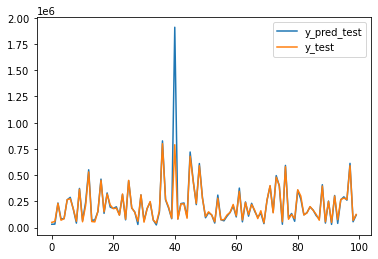

In [98]:
y_pred_test=model.predict(X_test)
y_pred_test=pd.DataFrame(y_pred_test)

y_test=pd.DataFrame(y_test)

concat=pd.concat([y_pred_test,y_test.reset_index(drop=True)],axis=1)
concat=concat.rename(columns={0:'y_pred_test','precio':'y_test'})
concat.iloc[0:100,:].plot()

Text(0.5, 1.0, 'Predicted vs Actual Values')

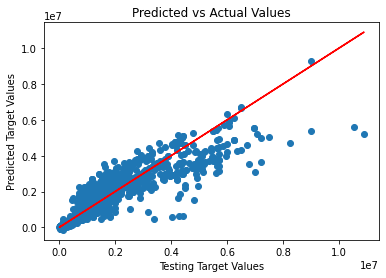

In [99]:
y_pred_test=model.predict(X_test)
y_pred_test=pd.DataFrame(y_pred_test)

fig, ax=plt.subplots()
ax.scatter(y_test,y_pred_test)
ax.plot(y_test,y_test,color='red')
ax.set_xlabel('Testing Target Values')
ax.set_ylabel('Predicted Target Values')
ax.set_title('Predicted vs Actual Values')

Observamos valores cercanos al 90% por lo cual consideramos que este set de modelos es el mejor, y mas explicitamente el modelo de prediccion basico de regresion lineal multiple es el mejor.  


### Cordoba:

Continuando por Cordoba, vamos a crear una mascara que permita filtrar nuestro dataset para poder trabajar solo con los datos de este distrito.


In [100]:
mascara_Cordoba = (precio_M2_dolar_sin_nulos["provincia"].str.contains("Córdoba"))
data_Cordoba=precio_M2_dolar_sin_nulos[mascara_Cordoba]
data_Cordoba["provincia"].value_counts()

Córdoba    6456
Name: provincia, dtype: int64

En el proximo paso vamos a eliminar los outliers de cada barrio por separado y vamos a crear un dataset que contenga los datos limpios.Tambien droppeamos la columna 'superficie_total_en_M2' por tener 5000 registros nulos. En su lugar podremos seguir trabajando con la columna 'superficie_cubierta_en_M2'que tiene 0 registros nulos.


In [101]:
data_Cordoba=data_Cordoba.drop(['superficie_total_en_M2'],axis=1)
list_barrios=[]
data_barrio_concat = pd.DataFrame(columns=['Tipo_de_operacion','tipo_de_propiedad','ciudad','ubicacion','provincia','precio','currency','Precio_aproximado_en_pesos','precio_aproximado_en_USD','superficie_cubierta_en_M2','Precio_en_Dolares_por_M2','precio_por_M2','place_name_2','tipo_de_propiedad_apartment','tipo_de_propiedad_house','tipo_de_propiedad_store'])
for x in data_Cordoba["ciudad"].unique():
    list_barrios.append(x)
    maskbarrio=data_Cordoba["ciudad"]==x
    data_barrio=data_Cordoba[maskbarrio]
    q1_barrio=data_barrio.Precio_en_Dolares_por_M2.quantile(0.25)
    q2_barrio=data_barrio.Precio_en_Dolares_por_M2.quantile(0.5)
    q3_barrio=data_barrio.Precio_en_Dolares_por_M2.quantile(0.75)
    iqr_barrio=(q3_barrio-q1_barrio)*1.5
    up_threshold_barrio = q3_barrio + iqr_barrio
    low_threshold_barrio = q1_barrio - iqr_barrio
    outlier_mask_up_barrio = data_barrio.Precio_en_Dolares_por_M2 > up_threshold_barrio
    outlier_mask_down_barrio = data_barrio.Precio_en_Dolares_por_M2 < low_threshold_barrio
    outlier_mask_barrio = np.logical_or(outlier_mask_up_barrio, outlier_mask_down_barrio)
    not_outliers_barrio = np.logical_not(outlier_mask_barrio)
    data_barrio_sin_outliers = data_barrio[not_outliers_barrio]
    #data_barrio_concat.append(data_barrio_sin_outliers)
    #pd.concat([data_barrio_concat, data_barrio_sin_outliers], ignore_index=True, sort=False)
    data_barrio_concat=pd.merge(data_barrio_concat, data_barrio_sin_outliers, how='outer')
data_barrio_concat

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2,tipo_de_propiedad_apartment,tipo_de_propiedad_house,tipo_de_propiedad_store
0,sell,apartment,Córdoba Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,550000.0,ARS,544262.59,30846.02,50.0,616.920400,11000.000000,,1,0,0
1,sell,apartment,Córdoba Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,50000.0,USD,882225.00,50000.00,53.0,943.396226,943.396226,,1,0,0
2,sell,apartment,Córdoba Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,120000.0,USD,2117340.00,120000.00,73.0,1643.835616,1643.835616,,1,0,0
3,sell,house,Córdoba Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,385000.0,USD,6793132.50,385000.00,416.0,925.480769,925.480769,,0,1,0
4,sell,PH,Córdoba Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,135000.0,USD,2382007.50,135000.00,95.0,1421.052632,1421.052632,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,sell,house,Córdoba Río de Los Sauces,|Argentina|Córdoba|Río de Los Sauces|,Córdoba,250000.0,USD,4411125.00,250000.00,434.0,576.036866,576.036866,,0,1,0
5977,sell,house,Córdoba Obispo Trejo,|Argentina|Córdoba|Obispo Trejo|,Córdoba,500000.0,ARS,494784.06,28041.83,100.0,280.418300,5000.000000,,0,1,0
5978,sell,house,Córdoba El Manzano,|Argentina|Córdoba|El Manzano|,Córdoba,650000.0,ARS,643219.30,36454.38,90.0,405.048667,7222.222222,,0,1,0
5979,sell,house,Córdoba Calmayo,|Argentina|Córdoba|Calmayo|,Córdoba,60000.0,USD,1058670.00,60000.00,60.0,1000.000000,1000.000000,,0,1,0


Ahora seteamos los parametros para la creacion de los primeros 3 modelos: regresion lineal multiple, ridge, y lasso. Para cada caso primero utilizaremos un 65% de los datos para entrenar al modelo y el 35% restante para testearlo, pero posteriormente tambien haremos cross validation. Ademas, vamos a obtener los scores de Rcuad. y Rcuad.Ajustado para cada caso.


In [102]:
columnas = ['superficie_cubierta_en_M2', 'Precio_en_Dolares_por_M2','precio_por_M2', 'tipo_de_propiedad_apartment','tipo_de_propiedad_house', 'tipo_de_propiedad_store']

X = data_barrio_concat[columnas]
y = data_barrio_concat['precio']
n = data_barrio_concat.shape[0]
k = len(columnas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

for nombre, mdl in modelos.items():
    seleccion = mdl
    model = mdl.fit(X_train,y_train)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    print(nombre, model.score(X_test, y_test), scores)
    R_Ajustado = 1-((n-1)/(n-k-1))*(1-(model.score(X_test, y_test)))
    print("R ajustado: ", R_Ajustado)

ols 0.583671037691859 0.5679389856155441
R ajustado:  0.5832528967856239
ridge 0.5994598436005967 0.5846955055001242
R ajustado:  0.5990575602161983
lasso 0.592780372620995 0.5795666893690279
R ajustado:  0.5923713806952713


Como estos parametros no los consideramos aceptables, ahora vamos a realizar otro tipo de modelo para saber si creando dummies para cada barrio el modelo puede mejorar o no.

In [103]:
#Creamos dummys de la provicia de Cordoba para mejorar el modelo
categories = ["ciudad"]
for category in categories:
    serie = data_barrio_concat[category]
    dummies = pd.get_dummies(serie, drop_first= True, prefix=category)
    data_barrio_concat = pd.concat([data_barrio_concat, dummies], axis=1)

data_barrio_concat

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_cubierta_en_M2,...,ciudad_Córdoba Villa Los Aromos,ciudad_Córdoba Villa María,ciudad_Córdoba Villa Parque Santa Ana,ciudad_Córdoba Villa Parque Siquiman,ciudad_Córdoba Villa Rumipal,ciudad_Córdoba Villa Santa Cruz del Lago,ciudad_Córdoba Villa de Las Rosas,ciudad_Córdoba Villa de Soto,ciudad_Córdoba Villa del Dique,ciudad_Córdoba Villa del Totoral
0,sell,apartment,Córdoba Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,550000.0,ARS,544262.59,30846.02,50.0,...,0,0,0,0,0,0,0,0,0,0
1,sell,apartment,Córdoba Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,50000.0,USD,882225.00,50000.00,53.0,...,0,0,0,0,0,0,0,0,0,0
2,sell,apartment,Córdoba Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,120000.0,USD,2117340.00,120000.00,73.0,...,0,0,0,0,0,0,0,0,0,0
3,sell,house,Córdoba Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,385000.0,USD,6793132.50,385000.00,416.0,...,0,0,0,0,0,0,0,0,0,0
4,sell,PH,Córdoba Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,135000.0,USD,2382007.50,135000.00,95.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,sell,house,Córdoba Río de Los Sauces,|Argentina|Córdoba|Río de Los Sauces|,Córdoba,250000.0,USD,4411125.00,250000.00,434.0,...,0,0,0,0,0,0,0,0,0,0
5977,sell,house,Córdoba Obispo Trejo,|Argentina|Córdoba|Obispo Trejo|,Córdoba,500000.0,ARS,494784.06,28041.83,100.0,...,0,0,0,0,0,0,0,0,0,0
5978,sell,house,Córdoba El Manzano,|Argentina|Córdoba|El Manzano|,Córdoba,650000.0,ARS,643219.30,36454.38,90.0,...,0,0,0,0,0,0,0,0,0,0
5979,sell,house,Córdoba Calmayo,|Argentina|Córdoba|Calmayo|,Córdoba,60000.0,USD,1058670.00,60000.00,60.0,...,0,0,0,0,0,0,0,0,0,0


Ahora definimos cuales seran las variables explicativas de este nuevo set de modelos y los corremos. 


In [104]:
columnas_conbarrios_cba = data_barrio_concat.drop(['place_name_2','Tipo_de_operacion', 'tipo_de_propiedad', 'ciudad', 'ubicacion','provincia', 'precio', 'currency'], axis=1)

In [105]:
#Con los dummies de zona de cba logramos mejorar el modelo

#Para el modelo basico de train y test tuvimos que cambiar el test size porque hay menor cantidad de datos

X = columnas_conbarrios_cba
y = data_barrio_concat.precio
n = data_barrio_concat.shape[0]
k = len(columnas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

for nombre, mdl in modelos.items():
    seleccion = mdl
    model = mdl.fit(X_train,y_train)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    print(nombre, model.score(X_test, y_test), scores)
    R_Ajustado = 1-((n-1)/(n-k-1))*(1-(model.score(X_test, y_test)))
    print("R ajustado: ", R_Ajustado)

ols 0.697390435080094 0.6395867935812443
R ajustado:  0.6970865084999938
ridge 0.6741939636939756 0.617110419303558
R ajustado:  0.6738667396869725
lasso 0.6813303600460443 0.6046878426115662
R ajustado:  0.6810103034943664


<AxesSubplot:>

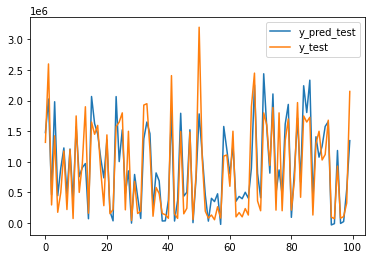

In [106]:
y_pred_test=model.predict(X_test)
y_pred_test=pd.DataFrame(y_pred_test)

y_test=pd.DataFrame(y_test)

concat=pd.concat([y_pred_test,y_test.reset_index(drop=True)],axis=1)
concat=concat.rename(columns={0:'y_pred_test','precio':'y_test'})
concat.iloc[0:100,:].plot()

Text(0.5, 1.0, 'Predicted vs Actual Values')

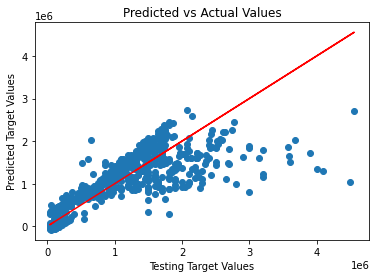

In [107]:
y_pred_test=model.predict(X_test)
y_pred_test=pd.DataFrame(y_pred_test)

fig, ax=plt.subplots()
ax.scatter(y_test,y_pred_test)
ax.plot(y_test,y_test,color='red')
ax.set_xlabel('Testing Target Values')
ax.set_ylabel('Predicted Target Values')
ax.set_title('Predicted vs Actual Values')

Observamos valores cercanos al 70% por lo cual consideramos que este set de modelos es aceptable, y mas explicitamente el modelo de prediccion basico de regresion lineal multiple es el mejor.  


### Santa Fe:

Por ultimo, para Santa Fe vamos a crear una mascara que permita filtrar nuestro dataset para poder trabajar solo con los datos de este distrito.


In [108]:
mascara_SantaFe = (precio_M2_dolar_sin_nulos["provincia"].str.contains("Santa Fe"))
data_SantaFe=precio_M2_dolar_sin_nulos[mascara_SantaFe]
data_SantaFe["provincia"].value_counts()

Santa Fe    4677
Name: provincia, dtype: int64

En el proximo paso vamos a eliminar los outliers de cada barrio por separado y vamos a crear un dataset que contenga los datos limpios.Tambien droppeamos la columna 'superficie_total_en_M2' por tener 5000 registros nulos. En su lugar podremos seguir trabajando con la columna 'superficie_cubierta_en_M2'que tiene 0 registros nulos.


In [109]:
data_SantaFe=data_SantaFe.drop(['superficie_total_en_M2'],axis=1)
list_barrios=[]
data_barrio_concat = pd.DataFrame(columns=['Tipo_de_operacion','tipo_de_propiedad','ciudad','ubicacion','provincia','precio','currency','Precio_aproximado_en_pesos','precio_aproximado_en_USD','superficie_cubierta_en_M2','Precio_en_Dolares_por_M2','precio_por_M2','place_name_2','tipo_de_propiedad_apartment','tipo_de_propiedad_house','tipo_de_propiedad_store'])
for x in data_SantaFe["ciudad"].unique():
    list_barrios.append(x)
    maskbarrio=data_SantaFe["ciudad"]==x
    data_barrio=data_SantaFe[maskbarrio]
    q1_barrio=data_barrio.Precio_en_Dolares_por_M2.quantile(0.25)
    q2_barrio=data_barrio.Precio_en_Dolares_por_M2.quantile(0.5)
    q3_barrio=data_barrio.Precio_en_Dolares_por_M2.quantile(0.75)
    iqr_barrio=(q3_barrio-q1_barrio)*1.5
    up_threshold_barrio = q3_barrio + iqr_barrio
    low_threshold_barrio = q1_barrio - iqr_barrio
    outlier_mask_up_barrio = data_barrio.Precio_en_Dolares_por_M2 > up_threshold_barrio
    outlier_mask_down_barrio = data_barrio.Precio_en_Dolares_por_M2 < low_threshold_barrio
    outlier_mask_barrio = np.logical_or(outlier_mask_up_barrio, outlier_mask_down_barrio)
    not_outliers_barrio = np.logical_not(outlier_mask_barrio)
    data_barrio_sin_outliers = data_barrio[not_outliers_barrio]
    #data_barrio_concat.append(data_barrio_sin_outliers)
    #pd.concat([data_barrio_concat, data_barrio_sin_outliers], ignore_index=True, sort=False)
    data_barrio_concat=pd.merge(data_barrio_concat, data_barrio_sin_outliers, how='outer')
data_barrio_concat

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_cubierta_en_M2,Precio_en_Dolares_por_M2,precio_por_M2,place_name_2,tipo_de_propiedad_apartment,tipo_de_propiedad_house,tipo_de_propiedad_store
0,sell,house,Santa Fe Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,300000.0,USD,5293350.00,300000.00,260.0,1153.846154,1153.846154,,0,1,0
1,sell,house,Santa Fe Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,300000.0,USD,5293350.00,300000.00,260.0,1153.846154,1153.846154,,0,1,0
2,sell,apartment,Santa Fe Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,1298000.0,ARS,1284459.78,72796.61,36.0,2022.128056,36055.555556,,1,0,0
3,sell,PH,Santa Fe Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,720000.0,ARS,712489.14,40380.24,29.0,1392.422069,24827.586207,,0,0,0
4,sell,apartment,Santa Fe Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,1050000.0,ARS,1039046.84,58887.86,40.0,1472.196500,26250.000000,,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330,sell,house,Santa Fe Alvear,|Argentina|Santa Fe|Alvear|,Santa Fe,1315000.0,ARS,1301282.40,73750.03,60.0,1229.167167,21916.666667,,0,1,0
4331,sell,house,Santa Fe Colastiné,|Argentina|Santa Fe|Colastiné|,Santa Fe,1400000.0,ARS,1385395.67,78517.14,20.0,3925.857000,70000.000000,,0,1,0
4332,sell,apartment,Santa Fe Franck,|Argentina|Santa Fe|Franck|,Santa Fe,1450000.0,ARS,1434874.20,81321.33,60.0,1355.355500,24166.666667,,1,0,0
4333,sell,house,Santa Fe Arroyo Ceibal,|Argentina|Santa Fe|Arroyo Ceibal|,Santa Fe,1600000.0,ARS,1583309.44,89733.88,20.0,4486.694000,80000.000000,,0,1,0


Ahora seteamos los parametros para la creacion de los primeros 3 modelos: regresion lineal multiple, ridge, y lasso. Para cada caso primero utilizaremos un 65% de los datos para entrenar al modelo y el 35% restante para testearlo, pero posteriormente tambien haremos cross validation. Ademas, vamos a obtener los scores de Rcuad. y Rcuad.Ajustado para cada caso.


In [110]:
#columnas = ['Precio_aproximado_en_pesos','precio_aproximado_en_USD', 'superficie_total_en_M2','superficie_cubierta_en_M2', 'Precio_en_Dolares_por_M2','precio_por_M2', 'tipo_de_propiedad_apartment','tipo_de_propiedad_house', 'tipo_de_propiedad_store']
columnas = ['superficie_cubierta_en_M2', 'Precio_en_Dolares_por_M2','precio_por_M2', 'tipo_de_propiedad_apartment','tipo_de_propiedad_house', 'tipo_de_propiedad_store']

print(len(columnas))
X = data_barrio_concat[columnas]
y = data_barrio_concat['precio']
n = data_barrio_concat.shape[0]
k = len(columnas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
for nombre, mdl in modelos.items():
    seleccion = mdl
    model = mdl.fit(X_train,y_train)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    print(nombre, model.score(X_test, y_test), scores)
    R_Ajustado = 1-((n-1)/(n-k-1))*(1-(model.score(X_test, y_test)))
    print("R ajustado: ", R_Ajustado)

6
ols 0.5171445560500292 -5.361960748201986
R ajustado:  0.5164751631055513
ridge 0.5072485048709867 -3.3571911085182515
R ajustado:  0.5065653928167413
lasso 0.5125722512820634 -2.250451176136005
R ajustado:  0.5118965196526023



Como estos resultados no son aceptables para el modelo, ahora vamos a realizar otro tipo de modelo para saber si creando dummies para cada barrio el modelo puede mejorar o no.


In [111]:
#Creamos dummys de la provicia de Santa Fe para mejorar el modelo
categories = ["ciudad"]
for category in categories:
    serie = data_barrio_concat[category]
    dummies = pd.get_dummies(serie, drop_first= True, prefix=category)
    data_barrio_concat = pd.concat([data_barrio_concat, dummies], axis=1)

data_barrio_concat

,Tipo_de_operacion,tipo_de_propiedad,ciudad,ubicacion,provincia,precio,currency,Precio_aproximado_en_pesos,precio_aproximado_en_USD,superficie_cubierta_en_M2,...,ciudad_Santa Fe San Carlos Centro,ciudad_Santa Fe San Jerónimo Norte,ciudad_Santa Fe San Jorge,ciudad_Santa Fe San Justo,ciudad_Santa Fe San Lorenzo,ciudad_Santa Fe Santa Fe,ciudad_Santa Fe Santo Tomé,ciudad_Santa Fe Timbúes,ciudad_Santa Fe Venado Tuerto,ciudad_Santa Fe Villa Constitución
0,sell,house,Santa Fe Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,300000.0,USD,5293350.00,300000.00,260.0,...,0,0,0,0,0,0,0,0,0,0
1,sell,house,Santa Fe Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,300000.0,USD,5293350.00,300000.00,260.0,...,0,0,0,0,0,0,0,0,0,0
2,sell,apartment,Santa Fe Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,1298000.0,ARS,1284459.78,72796.61,36.0,...,0,0,0,0,0,0,0,0,0,0
3,sell,PH,Santa Fe Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,720000.0,ARS,712489.14,40380.24,29.0,...,0,0,0,0,0,0,0,0,0,0
4,sell,apartment,Santa Fe Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,1050000.0,ARS,1039046.84,58887.86,40.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330,sell,house,Santa Fe Alvear,|Argentina|Santa Fe|Alvear|,Santa Fe,1315000.0,ARS,1301282.40,73750.03,60.0,...,0,0,0,0,0,0,0,0,0,0
4331,sell,house,Santa Fe Colastiné,|Argentina|Santa Fe|Colastiné|,Santa Fe,1400000.0,ARS,1385395.67,78517.14,20.0,...,0,0,0,0,0,0,0,0,0,0
4332,sell,apartment,Santa Fe Franck,|Argentina|Santa Fe|Franck|,Santa Fe,1450000.0,ARS,1434874.20,81321.33,60.0,...,0,0,0,0,0,0,0,0,0,0
4333,sell,house,Santa Fe Arroyo Ceibal,|Argentina|Santa Fe|Arroyo Ceibal|,Santa Fe,1600000.0,ARS,1583309.44,89733.88,20.0,...,0,0,0,0,0,0,0,0,0,0


Ahora definimos cuales seran las variables explicativas de este nuevo set de modelos y los corremos. 

In [112]:
columnas_conbarrios_stfe = data_barrio_concat.drop(['place_name_2','Tipo_de_operacion', 'tipo_de_propiedad', 'ciudad', 'ubicacion','provincia', 'precio', 'currency'], axis=1)

In [113]:
X = columnas_conbarrios_stfe
y = data_barrio_concat.precio
n = data_barrio_concat.shape[0]
k = len(columnas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

for nombre, mdl in modelos.items():
    seleccion = mdl
    model = mdl.fit(X_train,y_train)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(nombre, model.score(X_test, y_test), scores)
    R_Ajustado = 1-((n-1)/(n-k-1))*(1-(model.score(X_test, y_test)))
    print("R ajustado: ", R_Ajustado)

ols 0.6358543333939062 [ 0.64990498  0.6449486   0.62671169  0.61232048 -5.36753833]
R ajustado:  0.6353495103810511
ridge 0.6299484743286827 [0.65044466 0.63182522 0.62178605 0.56073818 0.27421718]
R ajustado:  0.6294354638956818
lasso 0.6429794974613289 [ 0.65161369  0.64894924  0.61509679  0.58644037 -4.95655857]
R ajustado:  0.6424845522175137


Observamos valores cercanos al 65% por lo cual consideramos que este set de modelos es relativamente aceptable, y mas explicitamente el modelo de prediccion lasso es el mejor.  

<AxesSubplot:>

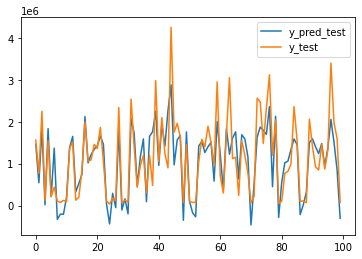

In [114]:
y_pred_test=model.predict(X_test)
y_pred_test=pd.DataFrame(y_pred_test)

y_test=pd.DataFrame(y_test)

concat=pd.concat([y_pred_test,y_test.reset_index(drop=True)],axis=1)
concat=concat.rename(columns={0:'y_pred_test','precio':'y_test'})
concat.iloc[0:100,:].plot()

Text(0.5, 1.0, 'Predicted vs Actual Values')

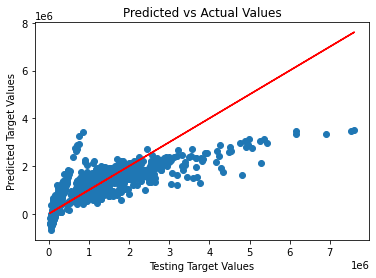

In [115]:
fig, ax=plt.subplots()
ax.scatter(y_test,y_pred_test)
ax.plot(y_test,y_test,color='red')
ax.set_xlabel('Testing Target Values')
ax.set_ylabel('Predicted Target Values')
ax.set_title('Predicted vs Actual Values')